In [3]:
import tensorflow as tf 
print(tf.config.list_physical_devices('GPU'))



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [25]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/2d/30/3afb8bcb785653254eb646ff2680ec4d637b40b06f4b046aca17b5e086b0/scikit_learn-1.3.0-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/96/9b/10048be0c335327077af430c5a6637c0b9e7fe9121a8048836f1bb022a81/scipy-1.11.1-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/59.1 kB ? eta -:--:--
     -------------------- ------------------- 30.7/59.1 kB 1.4 MB/s eta 0:00:01
     ---------------------------------------- 59.1/59.1 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 k

In [26]:
import math
import matplotlib.pyplot as plt
import keras
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.models import Sequential


In [3]:
! pip install seaborn

In [4]:
! pip install matplotlib

In [5]:
! pip install scikit-learn

In [27]:
from tensorflow.keras.utils import image_dataset_from_directory
import pathlib

In [28]:
data_folder = pathlib.Path('../../facial_expression_recognition/images')

train_dataset = image_dataset_from_directory(
    data_folder / "train",
    image_size=(48, 48),
    label_mode='categorical',
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    data_folder / "validation",
    image_size=(48, 48),
    label_mode='categorical',
    batch_size=32)

Found 28821 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [17]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

tf.Tensor(
[[[[  9.   9.   9.]
   [  7.   7.   7.]
   [  6.   6.   6.]
   ...
   [ 28.  28.  28.]
   [ 17.  17.  17.]
   [ 69.  69.  69.]]

  [[  2.   2.   2.]
   [  9.   9.   9.]
   [  8.   8.   8.]
   ...
   [ 23.  23.  23.]
   [ 29.  29.  29.]
   [ 70.  70.  70.]]

  [[  4.   4.   4.]
   [  3.   3.   3.]
   [  8.   8.   8.]
   ...
   [  0.   0.   0.]
   [ 14.  14.  14.]
   [ 57.  57.  57.]]

  ...

  [[  5.   5.   5.]
   [  5.   5.   5.]
   [  1.   1.   1.]
   ...
   [162. 162. 162.]
   [161. 161. 161.]
   [155. 155. 155.]]

  [[  1.   1.   1.]
   [  0.   0.   0.]
   [  0.   0.   0.]
   ...
   [159. 159. 159.]
   [159. 159. 159.]
   [154. 154. 154.]]

  [[  0.   0.   0.]
   [  1.   1.   1.]
   [  0.   0.   0.]
   ...
   [153. 153. 153.]
   [156. 156. 156.]
   [153. 153. 153.]]]


 [[[ 50.  50.  50.]
   [ 22.  22.  22.]
   [  9.   9.   9.]
   ...
   [ 86.  86.  86.]
   [ 95.  95.  95.]
   [104. 104. 104.]]

  [[ 44.  44.  44.]
   [ 14.  14.  14.]
   [  8.   8.   8.]
   ...
   [ 94.  

In [9]:
for data_batch, labels_batch in validation_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 48, 48, 3)
labels batch shape: (32, 7)


In [10]:
! pip install pillow

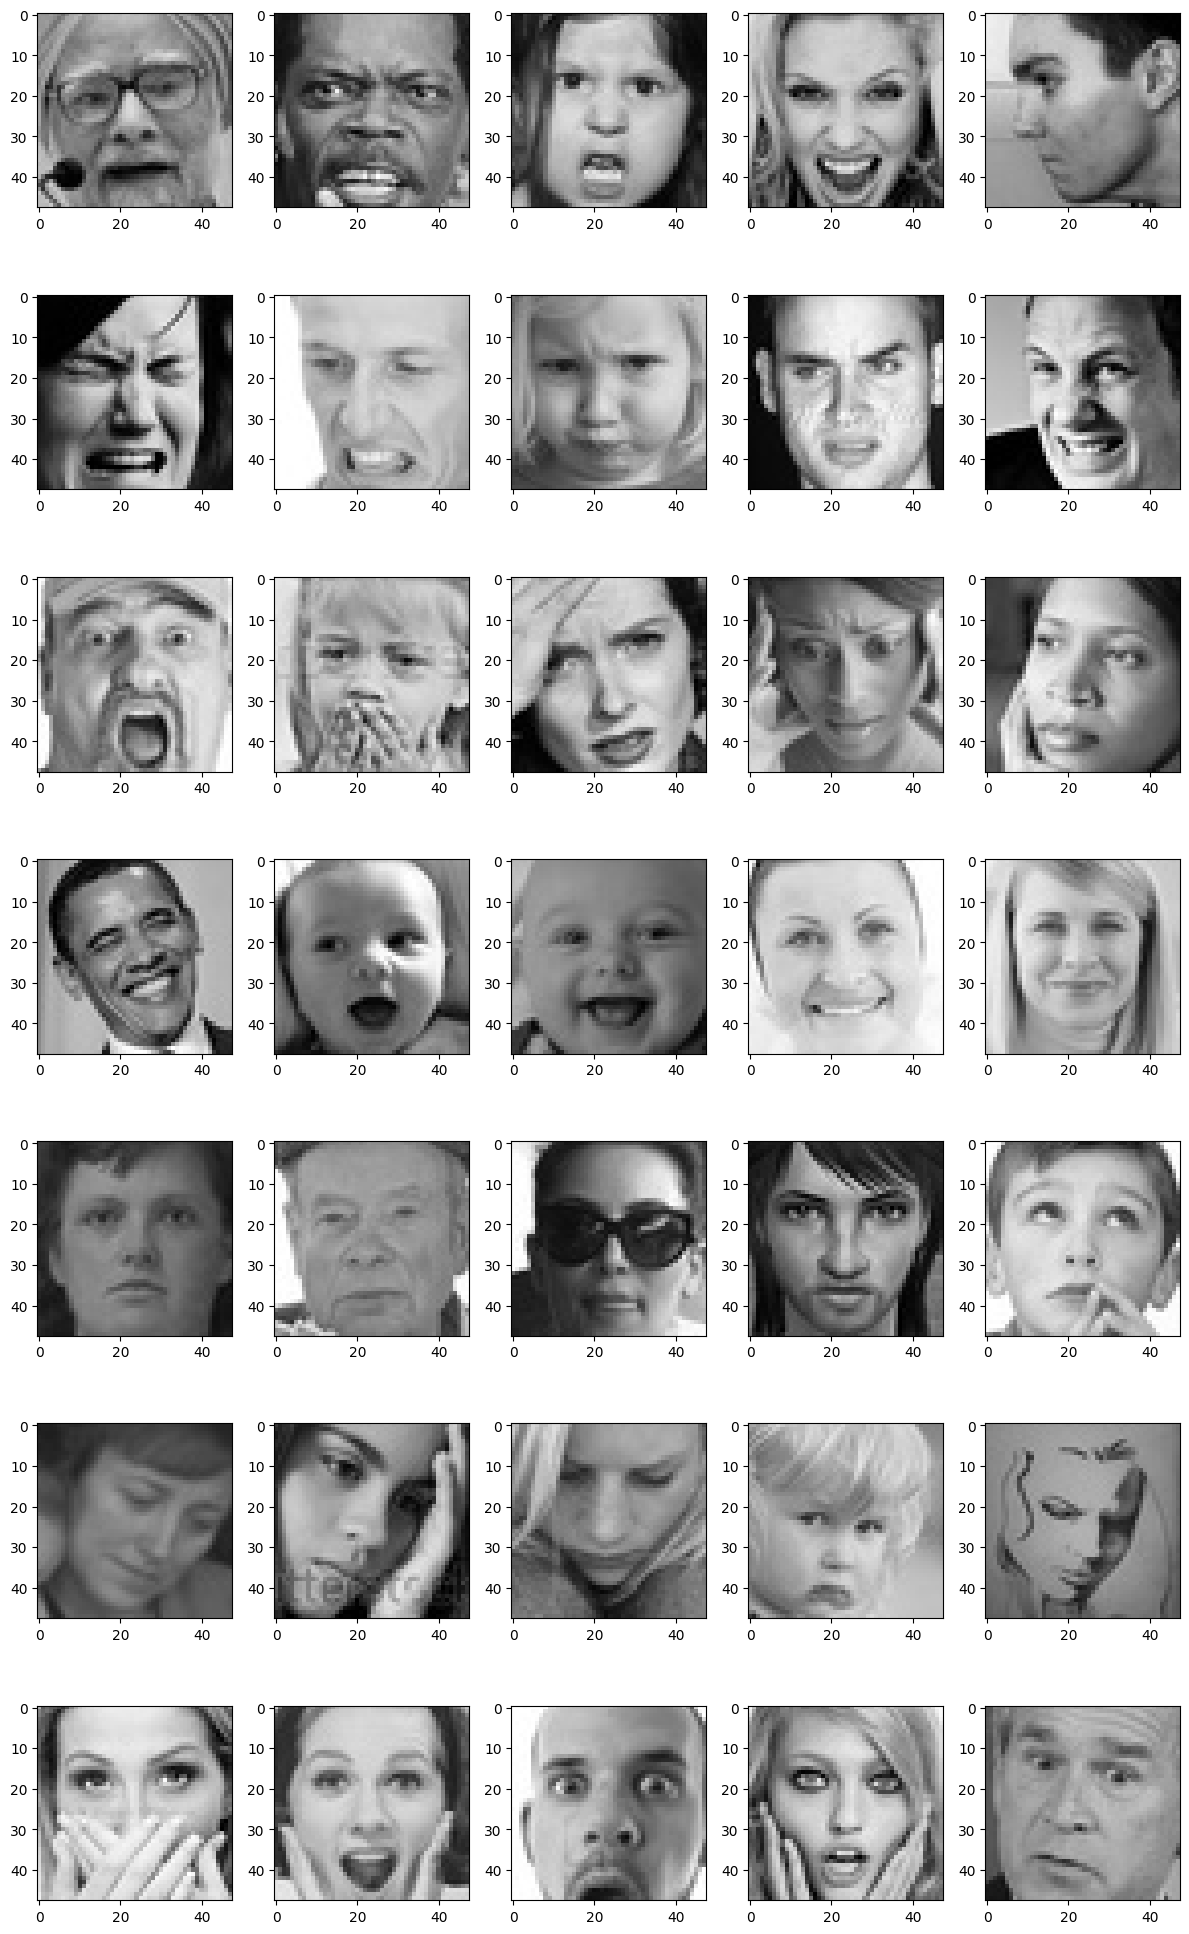

In [11]:
import numpy as np
import seaborn as sns
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48

# input path for the images
base_path = "../../facial_expression_recognition/images/"

plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path + "train/"):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + "train/" + expression + "/" +os.listdir(base_path + "train/" + expression)[i], target_size=(pic_size, pic_size))
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [ ]:
# count number of train images for each expression

for expression in os.listdir(base_path + "train"):
    print(str(len(os.listdir(base_path + "train/" + expression))) + " " + expression + " images")

In [33]:
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam
from tensorflow import keras


In [ ]:

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/original_model.keras",
        save_best_only=True,
        monitor="val_loss")
]
history_3 = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
901/901 [==============================] - 68s 70ms/step - loss: 1.9280 - accuracy: 0.2559 - val_loss: 1.7488 - val_accuracy: 0.3314
Epoch 2/50
901/901 [==============================] - 13s 15ms/step - loss: 1.7150 - accuracy: 0.3423 - val_loss: 1.6735 - val_accuracy: 0.3800
Epoch 3/50
901/901 [==============================] - 13s 14ms/step - loss: 1.6106 - accuracy: 0.3841 - val_loss: 1.5604 - val_accuracy: 0.4234
Epoch 4/50
901/901 [==============================] - 13s 15ms/step - loss: 1.5017 - accuracy: 0.4233 - val_loss: 1.4928 - val_accuracy: 0.4435
Epoch 5/50
901/901 [==============================] - 13s 15ms/step - loss: 1.4238 - accuracy: 0.4544 - val_loss: 1.3782 - val_accuracy: 0.4803
Epoch 6/50
901/901 [==============================] - 14s 15ms/step - loss: 1.3617 - accuracy: 0.4824 - val_loss: 1.3273 - val_accuracy: 0.4952
Epoch 7/50
901/901 [==============================] - 13s 15ms/step - loss: 1.3064 - accuracy: 0.4982 - val_loss: 1.3291 - val_accuracy:

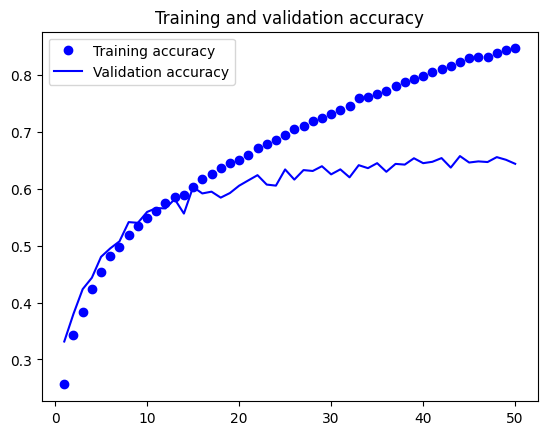

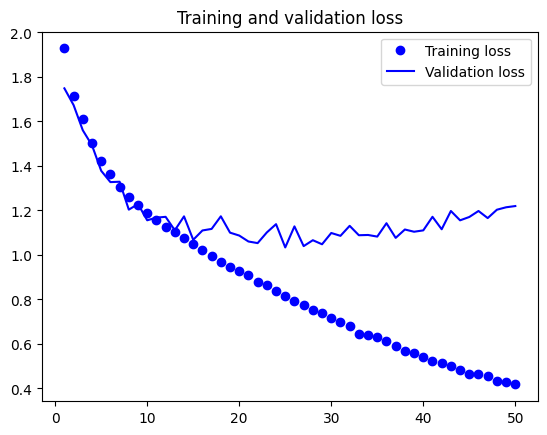

In [25]:
acc = history_3.history["accuracy"]
val_acc = history_3.history["val_accuracy"]
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# 2nd model: Replacing Max Pooling with global average pooling

In [23]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(keepdims=True))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(keepdims=True))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(keepdims=True))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(keepdims=True))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))

In [24]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/average_pooling.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
901/901 [==============================] - 11s 11ms/step - loss: 2.0687 - accuracy: 0.1972 - val_loss: 1.7989 - val_accuracy: 0.2427
Epoch 2/50
901/901 [==============================] - 9s 10ms/step - loss: 1.9452 - accuracy: 0.2059 - val_loss: 1.7879 - val_accuracy: 0.2617
Epoch 3/50
901/901 [==============================] - 10s 11ms/step - loss: 1.9051 - accuracy: 0.2162 - val_loss: 1.7860 - val_accuracy: 0.2622
Epoch 4/50
901/901 [==============================] - 12s 13ms/step - loss: 1.8811 - accuracy: 0.2207 - val_loss: 1.7789 - val_accuracy: 0.2620
Epoch 5/50
901/901 [==============================] - 12s 13ms/step - loss: 1.8604 - accuracy: 0.2195 - val_loss: 1.7799 - val_accuracy: 0.2631
Epoch 6/50
901/901 [==============================] - 10s 11ms/step - loss: 1.8491 - accuracy: 0.2271 - val_loss: 1.7790 - val_accuracy: 0.2560
Epoch 7/50
901/901 [==============================] - 11s 12ms/step - loss: 1.8418 - accuracy: 0.2263 - val_loss: 1.7771 - val_accuracy: 

Train and validation accuracy have dropped considerably.

# 3rd model: data augmentation and decreasing learning rate

tensorflow 2.10 data augmentation slows down __[https://stackoverflow.com/questions/73304934/tensorflow-data-augmentation-gives-a-warning-using-a-while-loop-for-converting]__ Because of this bug, we couldn't integrate data augmentation step. In order to work with higer versions of tensorflow in Windows, we had to install WSL2, but because of the limited time, swe didn't try it.

In [29]:
""" from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        layers.RandomBrightness(factor=0.2)
    ]
) """

In [36]:
model = Sequential()
nb_classes = 7

# 1 - Convolution
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48, 48, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(nb_classes, activation='softmax'))


In [37]:
opt = Adam(learning_rate=1e-5)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="./models/augmented_lr_decreased.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50


901/901 [==============================] - 73s 74ms/step - loss: 2.1898 - accuracy: 0.1889 - val_loss: 1.8469 - val_accuracy: 0.2744
Epoch 2/50
901/901 [==============================] - 14s 16ms/step - loss: 2.0358 - accuracy: 0.2268 - val_loss: 1.8164 - val_accuracy: 0.2617
Epoch 3/50
901/901 [==============================] - 15s 16ms/step - loss: 1.9760 - accuracy: 0.2463 - val_loss: 1.7686 - val_accuracy: 0.3054
Epoch 4/50
901/901 [==============================] - 14s 16ms/step - loss: 1.9326 - accuracy: 0.2586 - val_loss: 1.7587 - val_accuracy: 0.3130
Epoch 5/50
901/901 [==============================] - 14s 16ms/step - loss: 1.8940 - accuracy: 0.2737 - val_loss: 1.7578 - val_accuracy: 0.3145
Epoch 6/50
901/901 [==============================] - 14s 16ms/step - loss: 1.8684 - accuracy: 0.2839 - val_loss: 1.7290 - val_accuracy: 0.3317
Epoch 7/50
901/901 [==============================] - 14s 16ms/step - loss: 1.8348 - accuracy: 0.2944 - val_loss: 1.7096 - val_accuracy: 0.3351
Epo